<a href="https://colab.research.google.com/github/callmesukhi/BFVM19PROG1/blob/main/assessments/Assignment_week_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 02 Assignment glucose level data

Welcome to week two of this course programming 1. You will learn about time related data wrangling with pandas and you will learn to visualize with bokeh. This week will be focussed around missing data. Concretely, you will preprocess the glucose json file using interpolation to impute in order to conduct visual analysis. Learning outcomes:

- load a json dataset 
- typecast the Pandas DataFrame to appropiate data types
- inspect the dataset for quality and metadata information
- add a column with interpolated data in Pandas DataFrame
- perform visual analysis

The assignment consists of 6 parts:

- [part 1: load the data](#0)
     - [Exercise 1.1](#ex-11)
- [part 2: prepare for inspection](#1)
     - [Exercise 2.1](#ex-21)
- [part 3: inspect the data](#2)
     - [Exercise 3.1](#ex-31)
- [part 4: interpolate the data](#3)
     - [Exercise 4.1](#ex-41)
- [part 5: visualize the data](#4)
     - [Exercise 5.1](#ex-51)
- [part 6: Challenge](#5)
     - [Exercise 6.1](#ex-61)

Part 1 and 5 are mandatory, part 6 is optional (bonus)
To pass the assingnment you need to a score of 60%. 


<a name='0'></a>
## Part 1: Load the data

Instructions: Load the json datafile `glucose.json` into a pandas dataframe. Check your dataframe with a `.head()` to compare with the expected outcome

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>json.load() method reads a file, pd.read_json converts it to a Pandas DataFrame</li>
    <li>when loading into a Pandas DataFrame use records orientation </li>
</ul>
</details>

<a name='ex-11'></a>
### Code your solution

In [3]:
# importing the essential libraries 
import pandas as pd
import numpy as np
import json

In [4]:
# opening, loading and reading the json file into pandas data frame
load_file = json.load(open('/content/glucose.json'))
df = pd.read_json(load_file, orient='records')
df.head()

,ID,time,recordtype,glucose
0,2845.0,2019-04-25 00:08,1,109
1,2850.0,2019-04-25 00:50,1,
2,2877.0,2019-04-25 07:02,1,123
3,2881.0,2019-04-25 07:34,1,158
4,2886.0,2019-04-25 08:19,1,


#### Expected outcome: 

       ID              time  recordtype glucose
0  2845.0  2019-04-25 00:08           1     109
1  2850.0  2019-04-25 00:50           1        
2  2877.0  2019-04-25 07:02           1     123
3  2881.0  2019-04-25 07:34           1     158
4  2886.0  2019-04-25 08:19           1        

<a name='1'></a>
## Part 2: Prepare the data

Check the datatypes of your dataframe. The `glucose` field should be an integer, the `time` field should have a datetime format. If the datatypes are different you should typecast them to the right format.
Make sure that your dataset is sorted by the time column


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>use astype() method or pandas.DataFrame.to_datetime() for instance</li>
    <li>make sure that the empty spaces are filled with NaN. Use errors='coerce'</li>
    <li>set_index(), sort_index() and reset_index() are helpful to sort on index</li>
</ul>
</details>

<a name='ex-21'></a>
### Code your solution

In [5]:
# coverting 'glucose' column into int64 after filling the NaN with 0's and converting 'time' column into datetime type
df['glucose'] = pd.to_numeric(df.glucose, errors='coerce')
df['time'] = pd.to_datetime(df.time, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          136 non-null    float64       
 1   time        136 non-null    datetime64[ns]
 2   recordtype  136 non-null    int64         
 3   glucose     52 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 4.4 KB


In [6]:
# setting 'time' column as index column and sorting the data frame by 'time' column
df = df.set_index('time')
df = df.sort_index()
df = df.reset_index()
df.head()

,time,ID,recordtype,glucose
0,2019-04-25 00:08:00,2.845000e+03,1,109.0
1,2019-04-25 00:14:00,1.614305e+19,0,NaN
2,2019-04-25 00:29:00,1.614305e+19,0,NaN
3,2019-04-25 00:44:00,1.614305e+19,0,NaN
4,2019-04-25 00:50:00,2.850000e+03,1,NaN


#### Expected outcome: 

ID                     int64
time          datetime64[ns]
recordtype             int64
glucose              float64
dtype: object

<a name='2'></a>
## Part 3: Inspect the data

Now that we prepared the data we are going to inspect the data to get more familiar with the data. You are required to do the following

- inspect the percentage missing data for glucose
- what is the relationship between recordtype and glucose value?
- what is the relationship between ID and glucose value?

Code the solutions to your answers. Create meaningful overviews or statistics

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>In the week 01 assignment some functions were explained to inspect missing values</li>
    <li>In the week 01 assignment some functions were explained to groupby value</li>
</ul>
</details>

<a name='ex-31'></a>
### Code your solution

In [16]:
# percentage of missing values
missing_values = df.isnull().mean()
print(f"Percentage of missing values is: {round((missing_values.glucose * 100), 2)}%")
print(f"Result in expected format: {missing_values.glucose}")

Percentage of missing values is: 61.76%
Result in expected format: 0.6176470588235294


#### Expected outcome percentage missing data
0.6176470588235294

<a name='3'></a>
## Part 4: Interpolate the data

A lot of data is missing. Use interpolation to fill the missing values. Create a new column with the interpolated data. Take an argumentative approach. Select an interpolation method that suits the nature of the data and explain your choice. Mind you that the expected outcome of the interpolation values can differ from the example below

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>use Pandas.DataFrame.interpolate() method</li>
</ul>
</details>

<a name='ex-41'></a>
### Code your solution

In [23]:
df['interpolated'] = df.glucose.interpolate(method='spline', order=1).ffill()
df
# decide on interpolation 
# statistics section - for example: 1 hours mean or so

# 

,time,ID,recordtype,glucose,interpolated
0,2019-04-25 00:08:00,2.845000e+03,1,109.0,109.000000
1,2019-04-25 00:14:00,1.614305e+19,0,NaN,109.464647
2,2019-04-25 00:29:00,1.614305e+19,0,NaN,109.938597
3,2019-04-25 00:44:00,1.614305e+19,0,NaN,110.412547
4,2019-04-25 00:50:00,2.850000e+03,1,NaN,110.886497
...,...,...,...,...,...
131,2019-04-25 23:02:00,1.614305e+19,0,NaN,107.718822
132,2019-04-25 23:18:00,1.614305e+19,0,NaN,109.336002
133,2019-04-25 23:31:00,3.062000e+03,1,111.0,111.000000
134,2019-04-25 23:33:00,1.614305e+19,0,NaN,112.570363


#### Example outcome

                 time                   ID  recordtype  glucose  interpolated
0 2019-04-25 00:08:00                 2845           1    109.0    109.000000
1 2019-04-25 00:14:00 -9223372036854775808           0      NaN    109.466667
2 2019-04-25 00:29:00 -9223372036854775808           0      NaN    109.933333
3 2019-04-25 00:44:00 -9223372036854775808           0      NaN    110.400000
4 2019-04-25 00:50:00                 2850           1      NaN    110.866667

<a name='4'></a>
## Part 5: Plot the data

Create a plot with the original data and the interpolated data. Consider what the best representation is for visualisation of actual values and modelled/imputed values. An example of such a plot is given below. This plot however is not considered the best practice. 

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>figure(x_axis_type='datetime') automatically makes nices labels of the datetime data</li>
</ul>
</details>

<a name='ex-51'></a>
### Code your solution

In [17]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot
from bokeh.io import output_notebook
from bokeh.plotting import ColumnDataSource
output_notebook()

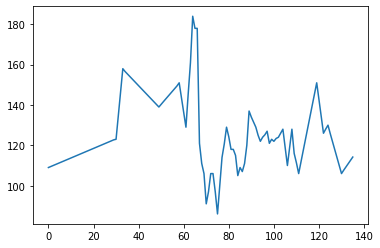

In [22]:
df.interpolated.plot()

<a name='6'></a>
## Part 6: Challenge

It might even be interesting to introduce a widget in which you can select different methods to interpolate.
1. Can you improve the interpolation by choosing an other method?
2. Can you add an rolling mean line? 
2. Can you improve the plot by making it interactive?

<a name='ex-61'></a>
### Code your solution

In [ ]:
from bokeh.models import CheckboxGroup
checkbox_widget = CheckboxGroup(labels=["box: 1", "box: 2", "box:3"], active=[1, 2])
show(checkbox_widget)